# Audio Fingerprinting

## Audio Load & Analysis

In [1]:
import os
import librosa
import soundfile
import numpy as np
from dotenv import load_dotenv
from kishikan import Kishikan
from kishikan.configs import SAMPLE_RATE

0 fingerprinted songs in db
Fingerprinting for dango.mp3...
Detected peaks (3659, 2)


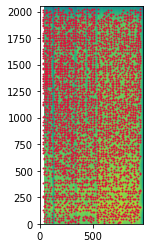

Fingerprinting for simon_says.mp3...
Detected peaks (9885, 2)


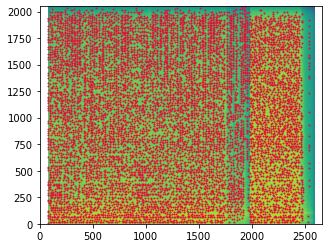

Fingerprinting for delicate.wav...
Detected peaks (9607, 2)


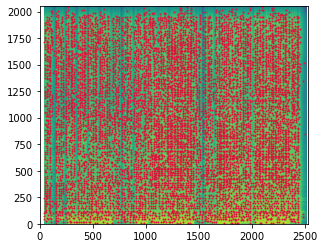

In [2]:
load_dotenv()
k = Kishikan(os.getenv('MONGO_URI'), verbose=True)
k.fingerprint('songs', is_dir=True)

## Audio Recognition from Input

### Room recorded audio test

Fingerprinting for test/delicate_room_noise_trim.wav...
Detected peaks (134, 2)


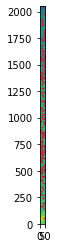

[{'_id': 'd3ab571d72b4ebcc306ef440df9ad1e0',
  'name': 'delicate',
  'ext': '.wav',
  'matches': 250,
  'offset': 5.573,
  'confidence': 0.926},
 {'_id': '8d18521c44de206b514772caad2992d0',
  'name': 'simon_says',
  'ext': '.mp3',
  'matches': 15,
  'offset': 18.855,
  'confidence': 0.056},
 {'_id': '5df5db10f495089c5caa5a833a467334',
  'name': 'dango',
  'ext': '.mp3',
  'matches': 5,
  'offset': 11.703,
  'confidence': 0.019}]

In [3]:
k.match('test/delicate_room_noise_trim.wav')

### Pick an audio, and add random noise

In [4]:
y, sr = librosa.load('songs/delicate.wav', mono=True, sr=SAMPLE_RATE)
noise=np.random.normal(0, 0.001, y.shape[0])
soundfile.write('test/delicate_random_noise.wav', y + noise, sr)